# Exercise 03: Hyperparameter Tuning Part 3: Effects of Randomness

**Make sure you have completed Exercise 01 and Exercise 02 before attempting this exercise!**

In this exercise, you will explore the effects of randomness on hyperparameter tuning.

You know the drill:

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


We'll return to the underlying model from Exercise 01:

In [3]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

The following code generates noisy samples of the model above.

For each polynomial degree,
it fits 20 models
that are trained
using different training/test data subsets.

The results are then plotted below.

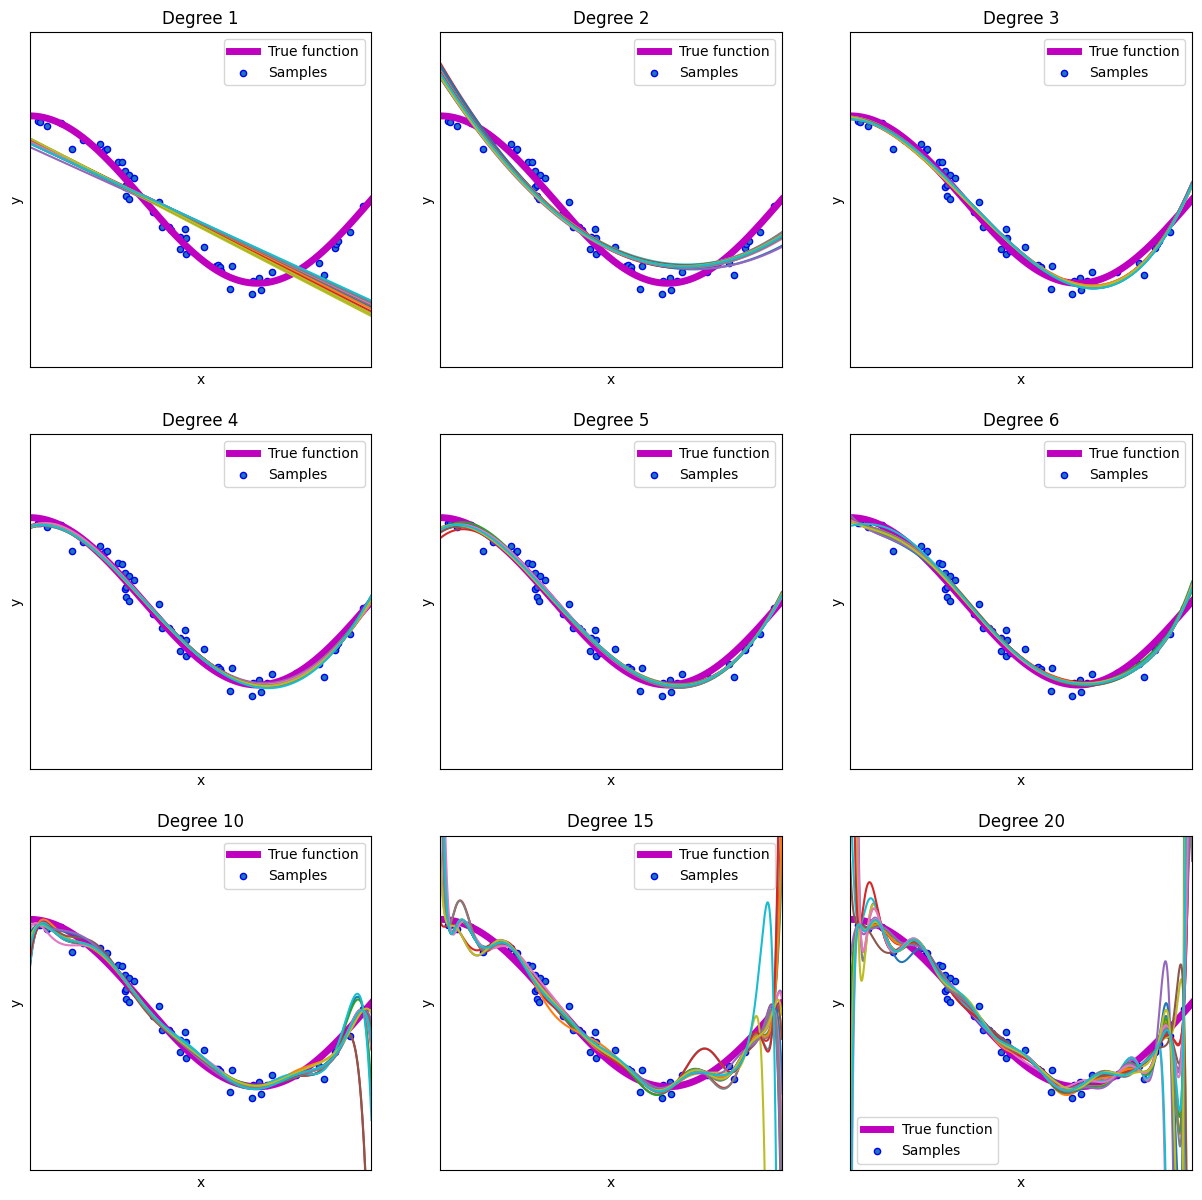

In [16]:
np.random.seed(3)

N_samples = 50
degrees = [1, 2, 3, 4, 5, 6, 10, 15, 20]

X_samples = np.sort(np.random.rand(N_samples))
y_samples = true_fun(X_samples) + np.random.randn(N_samples) * 0.1

N_cols = 3
N_rows = 1+(len(degrees)//N_cols)

plt.figure(figsize=(5*N_cols, 5*N_rows))
for i in range(len(degrees)):
    ax = plt.subplot(N_rows, N_cols, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    xs = np.linspace(0, 1, 1000)
    plt.plot(xs, true_fun(xs), linewidth=5.0, color='m', label="True function")
    plt.scatter(X_samples, y_samples, edgecolor="b", s=20, label="Samples")

    pipeline = Pipeline([
        ("poly",   PolynomialFeatures(degree=degrees[i], include_bias=False)),
        ("linreg", LinearRegression()),
    ])

    for run_idx in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X_samples, y_samples, test_size=0.1)
        pipeline.fit(X_train[:, np.newaxis], y_train)

        xs = np.linspace(0, 1, 1000)
        plt.plot(xs, pipeline.predict(xs[:, np.newaxis]))
        
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}".format(degrees[i]))

plt.show()

**Which polynomial degree gives the most reliable results?  Justify your conclusion.**

YOUR ANSWER HERE.

The degree that gives the more reliable results is degree 5 because it follows the True function the best without overfitting the data

**Are there any polynomial degrees that you'd avoid?  Why?**

YOUR ANSWER HERE.

I would avoid degree 20 because it overfits the model and it memorizes the data points

**What does changing the random seed do?  Why?  Would this be possible in practice?  How does it affect your preferred model?**

YOUR ANSWER HERE.

It seems changing the random seed will change the train split and the sample data. I think this would be possible in practice. I would still choose degree 6

(Make sure you reset the random seed to 3 before continuing.)

**What does increasing the noise standard deviation to 0.25 do?  Why?  Would this be possible in practice?  How does it affect your preferred model?**

YOUR ANSWER HERE.

It seems to be spreading out the data points. This is would be possible in practice in my opinion. I would again still choose degree 6

(Make sure you reset the standard deviation to 0.1 before continuing.)

**What does increasing the test fraction to 0.5 do?  Why?  Would this be possible in practice?  How does it affect your preferred model?**

YOUR ANSWER HERE.

It seems to introduce more models. I would choose degree 3 instead of 6. I think it would be possible in practice.

(Make sure you reset the test fraction to 0.1.)

**Which degree has the highest bias?  Which has the highest variance?**

YOUR ANSWER HERE.

degree 1 has the highest bias and degree 20 has the highest variance